In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

## Lecture des données

In [2]:
data=pd.read_csv('./Country-data.csv',sep=',',header=0)
data.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090  
2        76.5       2.89  4460

In [51]:
X=data.iloc[:,1:10].values
labels=data.iloc[:,0].values

In [52]:
PIB=X[:,8]
X=X[:,:8]

In [53]:
PIB[PIB<10000]=0
PIB[(PIB<20000) & (PIB>=10000)]=1
PIB[PIB>=20000]=2


## Importation des bibliothèques

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Normalisation

In [11]:
SS=StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)

#Xnorm=SS.fit_transform(X) ###A éviter quand des futures de données peuvent arriver

In [12]:
Xnorm[0,:]

array([ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
        0.15733622, -1.61909203,  1.90288227])

## PCA

In [13]:
pca=PCA(n_components=0.7)
pca.fit(Xnorm)

PCA(n_components=0.7)

#### Bon à savoir 

### Les valeurs propres sélectionnées

In [14]:
pca.explained_variance_

array([3.59615705, 1.55324696, 1.17038164])

### Information (variance) expriquée par valauer propre

In [15]:
pca.explained_variance_ratio_

array([0.4468279 , 0.19299326, 0.14542167])

In [16]:
np.sum(pca.explained_variance_ratio_)

0.7852428273466576

### Interprétation des axes

In [17]:
pca.components_

array([[-0.47287988,  0.30839609,  0.14456816,  0.19464001,  0.38678706,
        -0.22047498,  0.46419134, -0.45695156],
       [ 0.21412406,  0.60837422, -0.24160817,  0.66113128,  0.03120652,
         0.00577075, -0.23734341,  0.17670197],
       [-0.09998804,  0.14603735, -0.64740271, -0.28525732,  0.24777586,
         0.6157768 ,  0.15808191, -0.05108475]])

#### Bon à savoir 

In [18]:
1/np.sqrt(8)

0.35355339059327373

#### Axe 1

In [27]:
data.columns[1:-1]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer'],
      dtype='object')

In [19]:
pca.components_[0,:]

array([-0.47287988,  0.30839609,  0.14456816,  0.19464001,  0.38678706,
       -0.22047498,  0.46419134, -0.45695156])

#### Axe 2

In [20]:
pca.components_[1,:]

array([ 0.21412406,  0.60837422, -0.24160817,  0.66113128,  0.03120652,
        0.00577075, -0.23734341,  0.17670197])

#### Axe 3

In [21]:
pca.components_[2,:]

array([-0.09998804,  0.14603735, -0.64740271, -0.28525732,  0.24777586,
        0.6157768 ,  0.15808191, -0.05108475])

In [57]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]
len(pca.components_)

3

### Cercle de correlartion

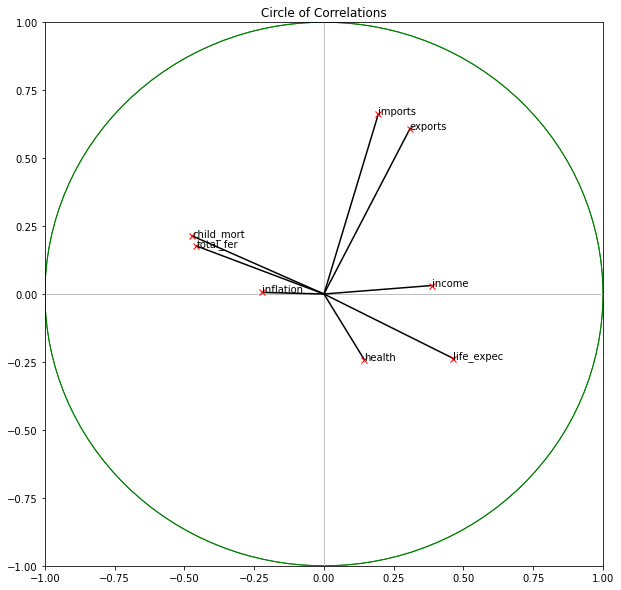

In [23]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(len(pca.components_))]

pc_infos=pd.DataFrame(coef,columns=cols, index=data.iloc[:,1:-1].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")
plt.show()

### Projection des données sur les nouveaux axes

In [24]:
X_pca=pca.transform(Xnorm)

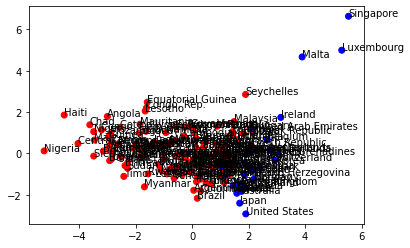

In [25]:
import matplotlib
colors=['red','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=PIB,cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


In [36]:
PIB.shape

(167,)

In [44]:
df = pd.DataFrame(np.concatenate((X_pca,PIB.reshape((-1,1))),axis=1),index=labels)

SyntaxError: unmatched ')' (<ipython-input-44-b880bac3119d>, line 1)

In [56]:
df1 = pd.DataFrame(np.concatenate((X_pca,PIB.reshape((-1,1))),axis=1),index=labels)

In [66]:
fig = px.scatter(df, 
                    x=0, 
                    y=1,  
                    text=df.index,
                    color=PIB, 
                    width=1000, 
                    height=1000)
fig

In [58]:
fig = px.scatter(df, 
                    x=0, 
                    y=2,  
                    text=df.index,
                    color=PIB, 
                    width=1000, 
                    height=1000)
fig

In [59]:
fig = px.scatter(df, 
                    x=1, 
                    y=2,  
                    text=df.index,
                    color=PIB, 
                    width=1000, 
                    height=1000)
fig

In [54]:
import plotly.express as px
fig = px.scatter_3d(df, 
                    x=0, 
                    y=1, 
                    z=2, 
                    text=df.index,
                    color=PIB, 
                    width=1000, 
                    height=1000)
fig

In [67]:
import pandas_profiling as pdf

In [68]:
p=pdf.ProfileReport(data)

In [69]:
p

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]